# Feature Importances

Plot the feature Importances of the Random Forest Models

In [53]:
#plot matplotlib figures in the notebook
%matplotlib inline

#auto reload modules before executing
%load_ext autoreload
%autoreload 2

#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import os, sys
import pickle

In [55]:
# columns to rename
col_rename = {'1300_02':'1.30 nm', '43000_09':'43.00 nm', '85550_13':'85.55 nm', '94400_18':'94.40 nm',
              'sin_SatMagLT':'sin(MLT)','cos_SatMagLT':'cos(MLT)', 
              'SYM_H index':'SYM-H'}

In [56]:
def feat_dat(ddir = 'D:/data/SatDensities/',
            dmod = ['SI','FI','FI_GEO']):
    """
    Function to return the out of feature importances from rf_model( )

    ----------
    
    None
    
    ddir: str
        file directory for data

    Returns
    -------
    os_df : Pandas DataFrame
        DataFrame with the out of sample data for each model.

    """  
    # create empty data frames for returning 
    imp_rf = { }

    # read in the data
    for mod in dmod:
        
        with open(ddir+f'{mod}_RFdat.pkl','rb') as f:
            print(f)
            dat_a = pickle.load(f)[1]
    
        dat_a.pop('mdi',None)
        imp_rf[mod] = dat_a
    
    return imp_rf

In [57]:
imp_dat = feat_dat( )
imp_dat['SI'].keys()

<_io.BufferedReader name='D:/data/SatDensities/SI_RFdat.pkl'>
<_io.BufferedReader name='D:/data/SatDensities/FI_RFdat.pkl'>
<_io.BufferedReader name='D:/data/SatDensities/FI_GEO_RFdat.pkl'>


dict_keys(['imp_te', 'imp_tr', 'imp_oos', 'imp_oos2'])

Text(0.5, 1.0, 'Grace B\nTrain Data Set')

Text(0.5, 1.0, 'Grace A\nOut of Sample')

Text(0.5, 1.0, 'CHAMP\nOut of Sample')

Text(0, 0.5, 'Solar')

Text(0, 0.5, 'FISM')

Text(0, 0.5, 'FISM/Geo')

Text(0.02, 0.5, 'Model Feature')

Text(0.5, 0.01, '$\\mathregular{\\Delta r^2 = r^2_{base}-r^2_{permuted}} $')

<Figure size 640x480 with 0 Axes>

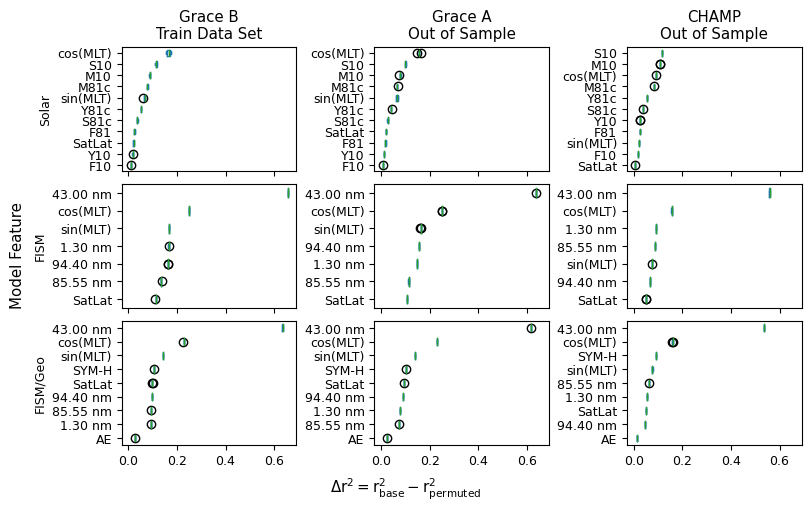

In [58]:
sfig = True
plt.rcParams.update({'font.size': 9})
plt.subplots_adjust(hspace=0)
#fig, ax = plt.subplots(8,1,figsize=(5,8),sharex=True, layout='constrained')
fig, ax = plt.subplots(3,3,figsize=(8,5),sharex=True, layout='constrained')

ax = ax.flatten()

ax_c = 0
for mod in imp_dat.keys():
    
    for key, p_df in imp_dat[mod].items():
        if key == 'imp_te':
            continue
        #key
        p_df = p_df.rename(columns=col_rename)
        #p_df

        ax[ax_c] = p_df.plot.box(vert=False, ax=ax[ax_c]) 

        ax_c = ax_c+1

ax[0].set_title('Grace B\nTrain Data Set')
ax[1].set_title('Grace A\nOut of Sample')
ax[2].set_title('CHAMP\nOut of Sample')

ax[0].set_ylabel('Solar')
ax[3].set_ylabel('FISM')
ax[6].set_ylabel('FISM/Geo')

fig.supylabel('Model Feature')
fig.supxlabel('$\mathregular{\Delta r^2 = r^2_{base}-r^2_{permuted}} $')

if sfig:
    fig.savefig(f'C:/Users/krmurph1/OneDrive/SatDrag_RF/Feature_Importances.pdf', dpi=300, format='pdf')